In [37]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display

In [38]:
def load_bike():
    data_mine = pd.read_csv('./datasets/201703-citibike-tripdata.csv')
    data_mine['one'] = 1
    data_mine['starttime'] = pd.to_datetime(data_mine['Start Time'])
    data_starttime = data_mine.set_index('starttime')
    data_resampled = data_starttime.resample('3h').sum().fillna(0)
    return data_resampled.one

citibike = load_bike()

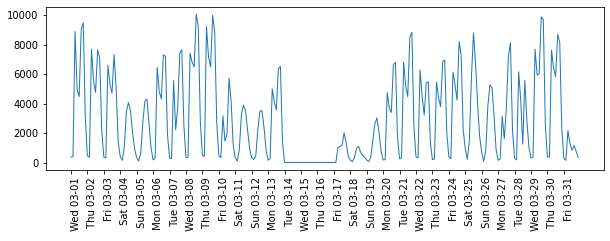

In [39]:
plt.figure(figsize=(10,3))
xticks = pd.date_range(citibike.index.min(),citibike.index.max(),freq='d')
plt.xticks(xticks,xticks.strftime(' %a %m-%d'),rotation=90,ha='left')
plt.plot(citibike, linewidth = 1)

In [40]:
y = pd.DataFrame(citibike.values)
X = np.array(citibike.index.astype('int64')).reshape(-1,1)//(10**9)

In [41]:
n_train = 184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10,3))

array([[1488326400],
       [1488337200],
       [1488348000],
       [1488358800],
       [1488369600],
       [1488380400],
       [1488391200],
       [1488402000],
       [1488412800],
       [1488423600]])